In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd/content/drive/My Drive/Python Collabs/Unsupervised Learning Clustering Checkpoint

/content/drive/My Drive/Python Collabs/Unsupervised Learning Clustering Checkpoint


# **Features Identification**

* **CUST_ID**: Identification of Credit Card holder (Categorical)
* **BALANCE**: Balance amount left in their account to make purchases (BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) 
* **PURCHASES**: Amount of purchases made from account 
* **ONEOFF_PURCHASES**: Maximum purchase amount done in one-go
* **INSTALLMENTS_PURCHASES**: Amount of purchase done in installment
* **CASH_ADVANCE**: Cash in advance given by the user
* **PURCHASES_FREQUENCY**: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* **ONEOFFPURCHASESFREQUENCY**: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* **PURCHASESINSTALLMENTSFREQUENCY**: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* **CASHADVANCEFREQUENCY**: How frequently the cash in advance being paid 
* **CASHADVANCETRX**: Number of Transactions made with "Cash in Advanced" 
* **PURCHASES_TRX**: Number of purchase transactions made
* **CREDIT_LIMIT**: Limit of Credit Card for user 
* **PAYMENTS**: Amount of Payment done by user
* **MINIMUM_PAYMENTS**: Minimum amount of payments made by user 
* **PRCFULLPAYMENT**: Percent of full payment paid by user
* **TENURE**: Tenure of credit card service for user

**importing Libraries**

In [3]:
import pandas as pd
import numpy as np
from scipy import stats as st
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

**Data Loading**

In [4]:
df=pd.read_csv("CC_GENERAL.csv",sep=',')

**Data Summary and Visualisation**

In [5]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

seeing the data distribution

<Axes: xlabel='MINIMUM_PAYMENTS', ylabel='Count'>

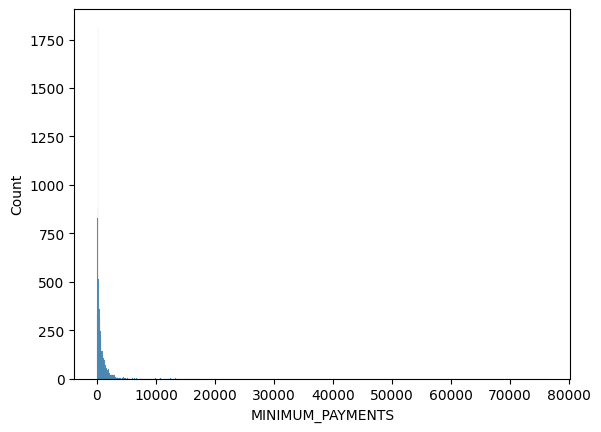

In [9]:
#plt.figure(figsize=(15,9))
sns.histplot(df.MINIMUM_PAYMENTS)

Visualization of MINIMUM_PAYMENTS feature

<Axes: xlabel='CREDIT_LIMIT', ylabel='Count'>

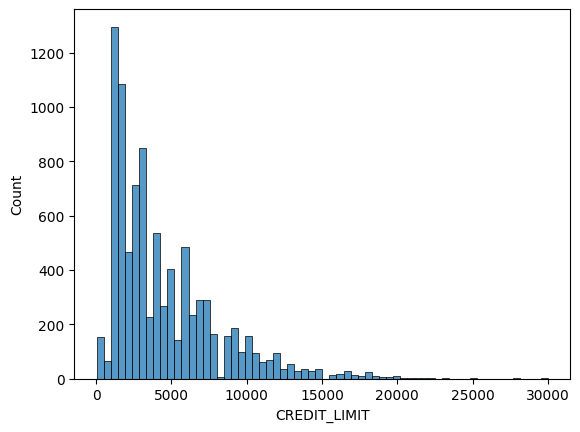

In [10]:
sns.histplot(df.CREDIT_LIMIT)

Visualization of CREDIT_LIMIT feature 

#**Data Cleaning and Preprocessing**

In [11]:
	df.MINIMUM_PAYMENTS= df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.median())  #Replacing missing values with median since the distibution is not normal

In [12]:
df.CREDIT_LIMIT= df.CREDIT_LIMIT.fillna(df.CREDIT_LIMIT.median())  #Replacing missing values with median since the distibution is not normal

In [13]:
df.drop(['CUST_ID'],axis=1,inplace=True)  # Dropping CUST_ID feature

#**Data Normalization**

In [14]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
columns_names=df.columns
d=scaler.fit_transform(df)
scaled_df=pd.DataFrame(d,columns=columns_names)
scaled_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
3,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.004088,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


#**Hierarchical clustering**

In [15]:
from sklearn.cluster import AgglomerativeClustering
model_AgCl=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')
clust_labels=model_AgCl.fit_predict(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [16]:
agglomerative=pd.DataFrame(clust_labels)

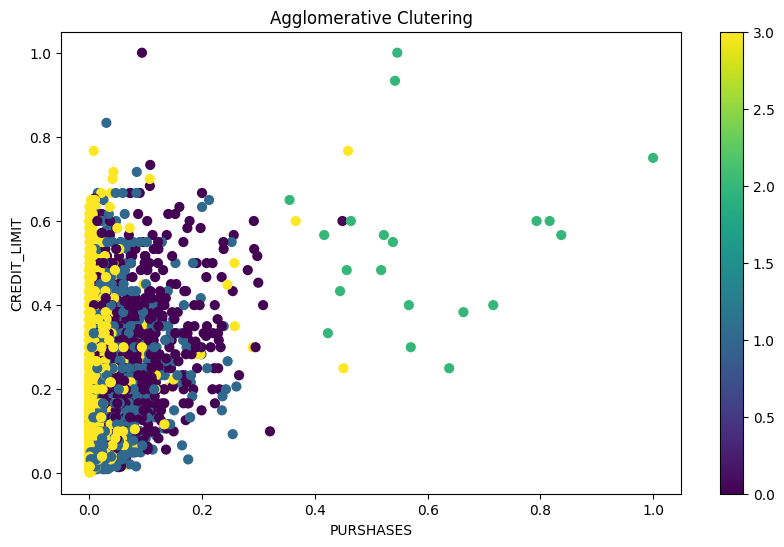

In [17]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
scatter=ax.scatter(scaled_df.PURCHASES,scaled_df.CREDIT_LIMIT,c=agglomerative[0],s=40)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("PURSHASES")
ax.set_ylabel("CREDIT_LIMIT")
plt.colorbar(scatter)

#**Plotting Dendrogram**

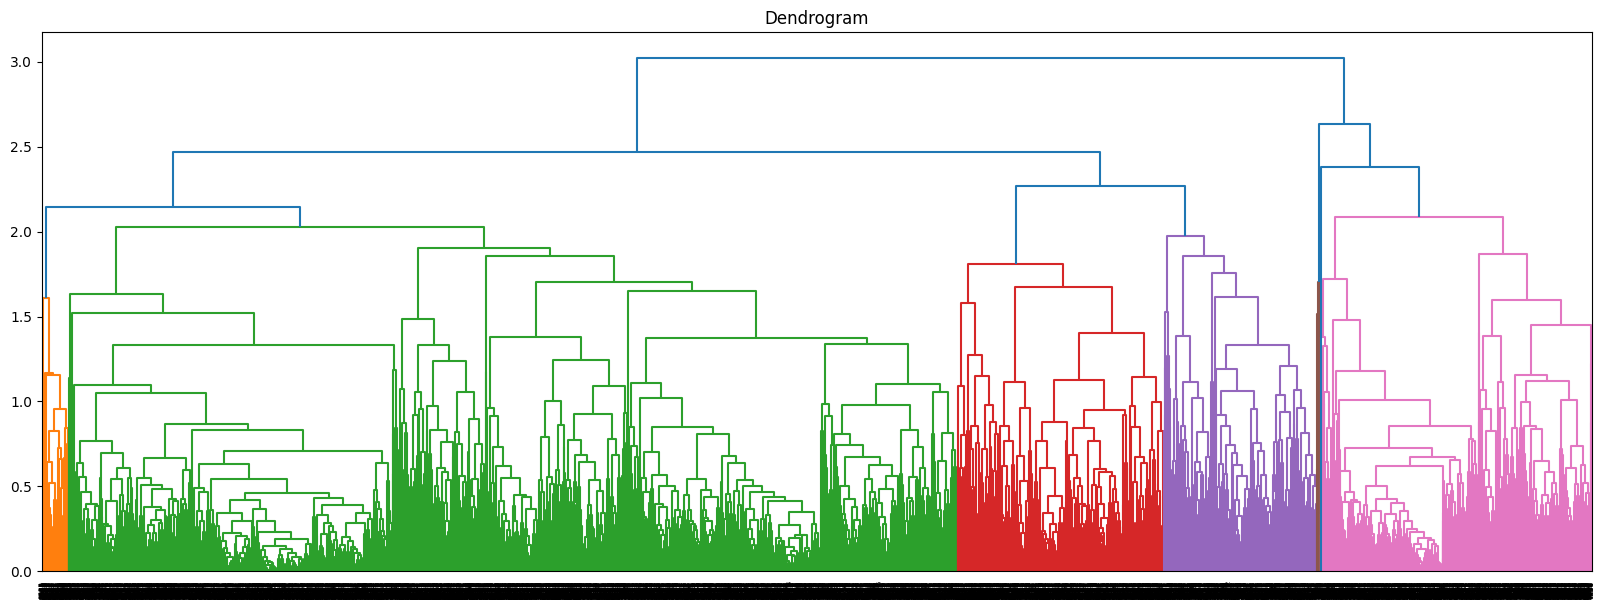

In [18]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20,7))
plt.title("Dendrogram")
dend=shc.dendrogram(shc.linkage(scaled_df,method='complete'))

#**KMEans Clustering**

In [19]:
selected_feat=scaled_df.iloc[:,[3,13]].values

In [20]:
from sklearn.cluster import KMeans
kmeans5=KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(selected_feat)
print(y_kmeans5)
kmeans5.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 4 0 ... 0 0 0]


array([[0.00715082, 0.0170096 ],
       [0.15235708, 0.13986354],
       [0.02981764, 0.37278832],
       [0.58200693, 0.58917025],
       [0.02743059, 0.09277826]])

In [21]:
label=pd.DataFrame(kmeans5.labels_)

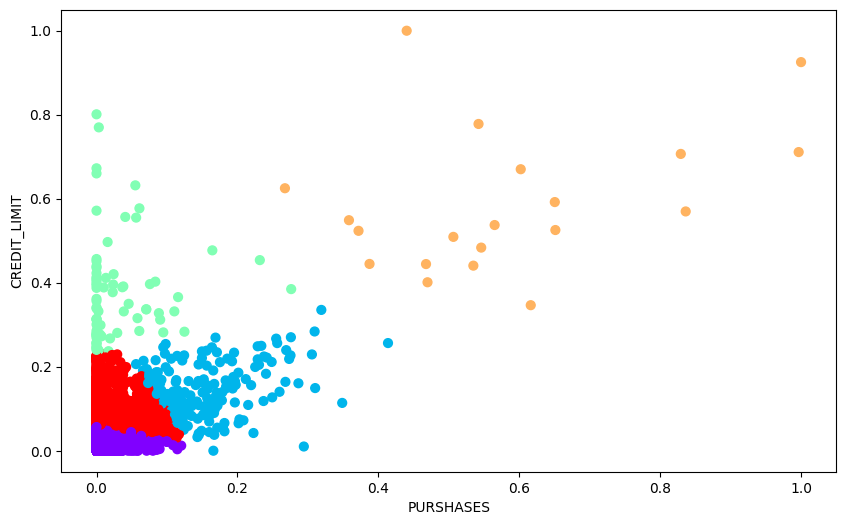

In [22]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
ax.set_xlabel("PURSHASES")
ax.set_ylabel("CREDIT_LIMIT")
plt.scatter(selected_feat[:, 0], selected_feat[:, 1], s = 40, c = y_kmeans5, cmap='rainbow',)

In [23]:
Sum_of_squared_distances=[]
K=range(1,15)
for k in K:
  km=KMeans(n_clusters=k)
  km=km.fit(scaled_df)
  Sum_of_squared_distances.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

**K choosing**

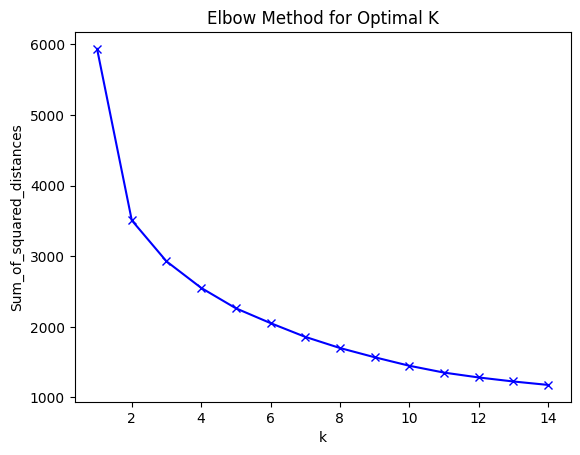

In [24]:
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method for Optimal K')
plt.show()

The best K value from the graph is K=2

In [25]:
kmeans2=KMeans(n_clusters=2)
y_kmeans2 = kmeans2.fit_predict(selected_feat)
print(y_kmeans2)
kmeans2.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 ... 0 0 0]


array([[0.01040612, 0.02487064],
       [0.09922218, 0.22493706]])

In [26]:
label=pd.DataFrame(kmeans2.labels_)

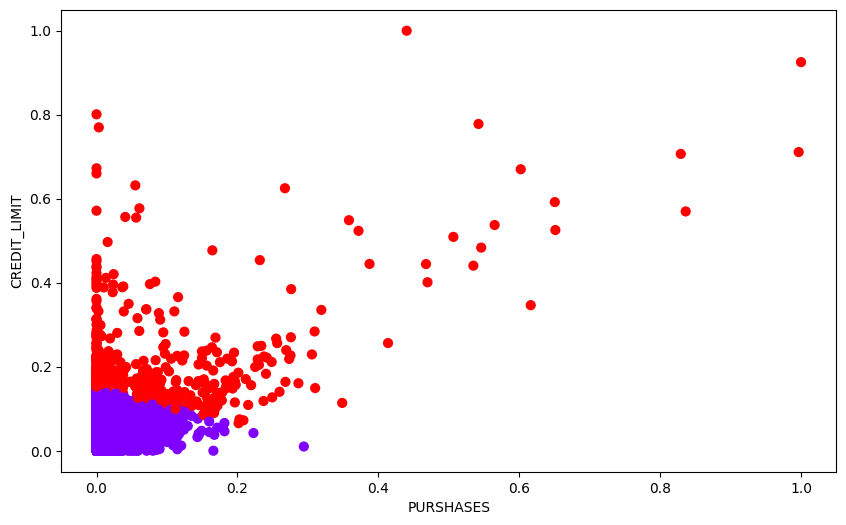

In [27]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
ax.set_xlabel("PURSHASES")
ax.set_ylabel("CREDIT_LIMIT")
plt.scatter(selected_feat[:, 0], selected_feat[:, 1], s = 40, c = y_kmeans2, cmap='rainbow',)

#**Conclusion**

The Hierarchical clustering method shows more condensed clusters to the region 'low purchases'

while The K means method shows further clear clusters

#**EXTRA PLOTS**

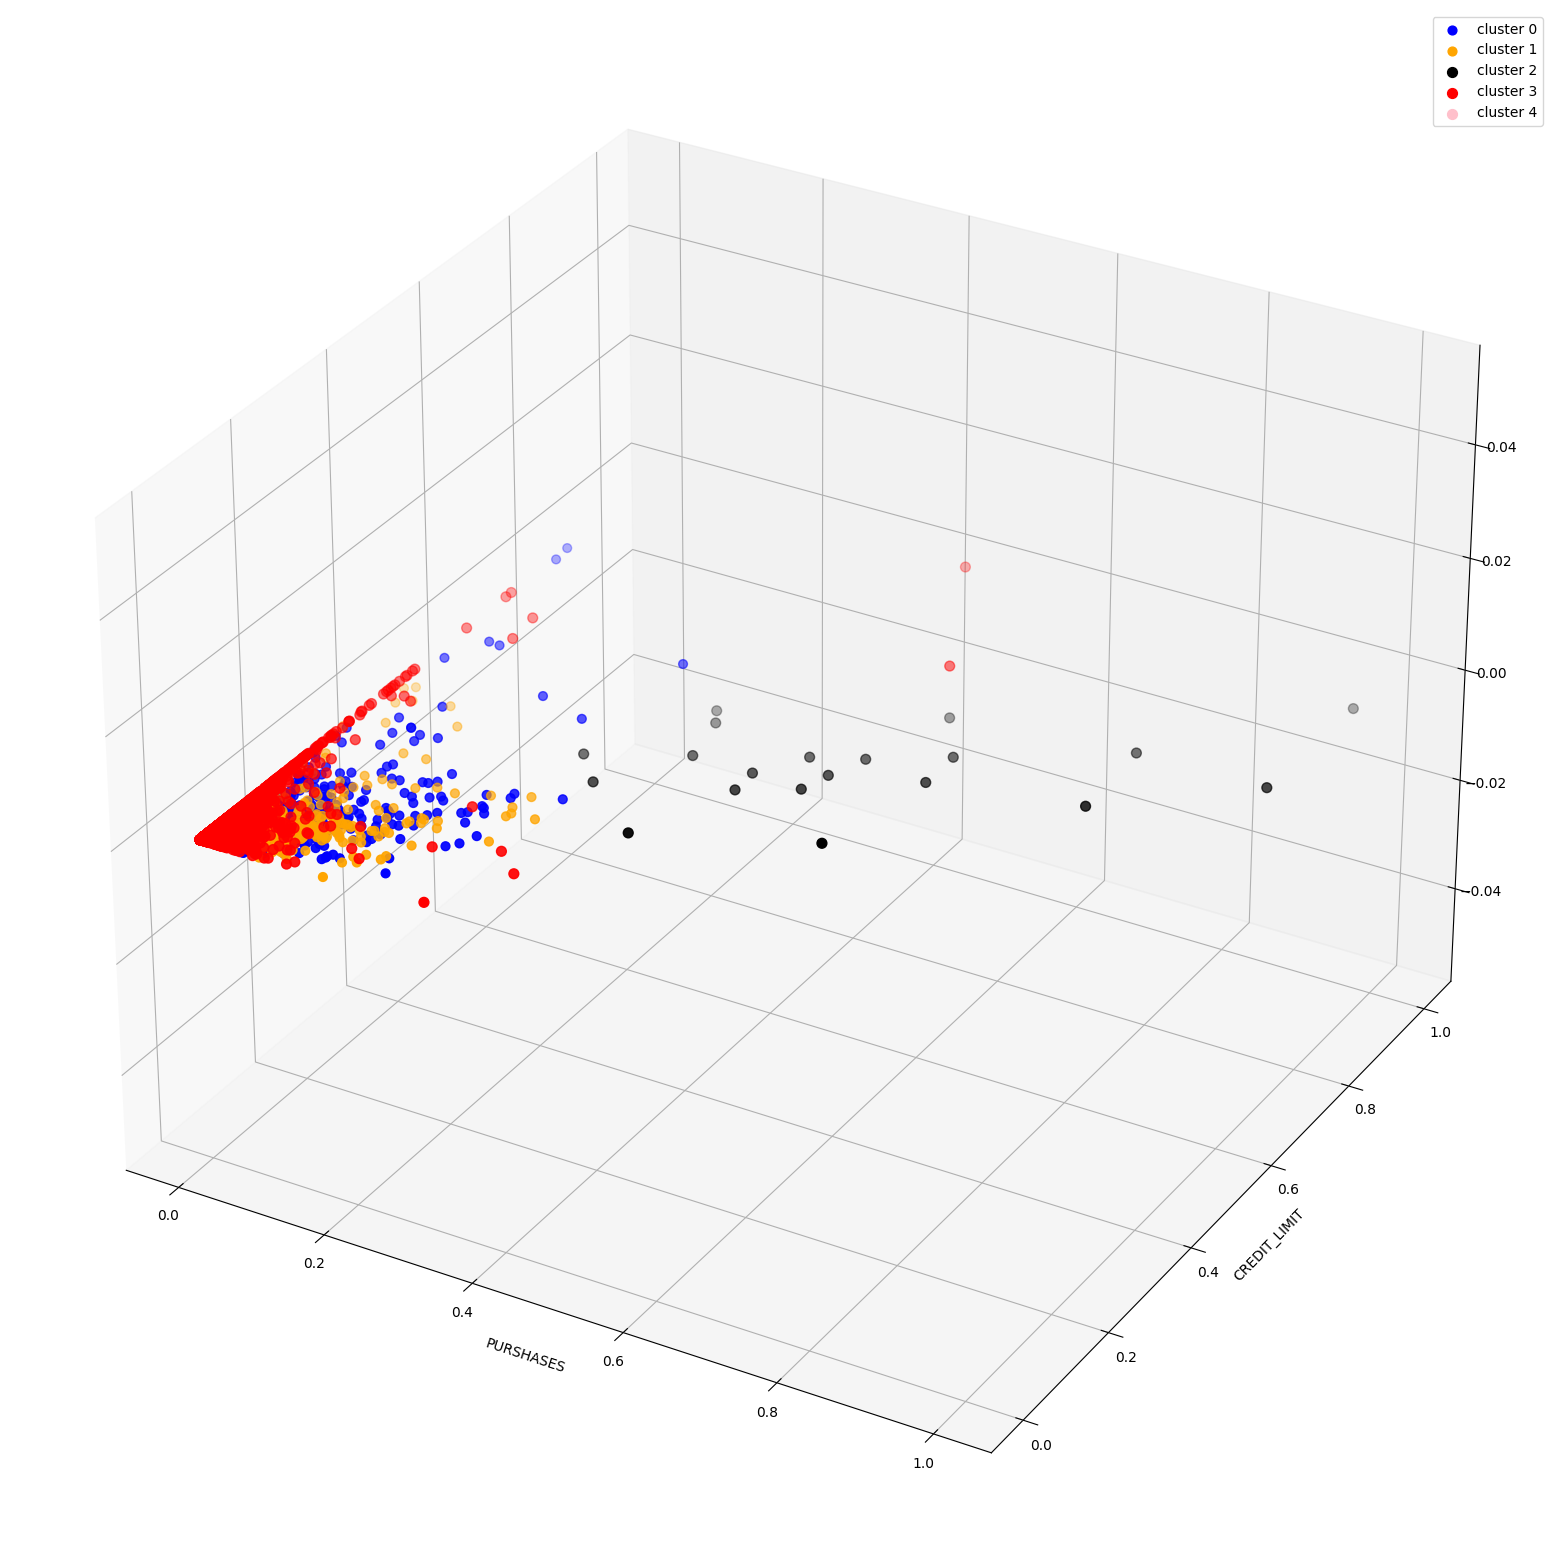

In [28]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(selected_feat[clust_labels == 0,0],selected_feat[clust_labels == 0,1], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(selected_feat[clust_labels == 1,0],selected_feat[clust_labels == 1,1], s = 40 , color = 'orange', label = "cluster 1")
plt.scatter(selected_feat[clust_labels == 2,0],selected_feat[clust_labels == 2,1],s = 50, c = 'black', label = "cluster 2")
plt.scatter(selected_feat[clust_labels == 3,0],selected_feat[clust_labels == 3,1],s = 50, c = 'red', label = "cluster 3")
plt.scatter(selected_feat[clust_labels == 4,0],selected_feat[clust_labels == 4,1],s = 50, c = 'pink', label = "cluster 4")
ax.set_xlabel('PURSHASES')
ax.set_ylabel('CREDIT_LIMIT')
ax.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


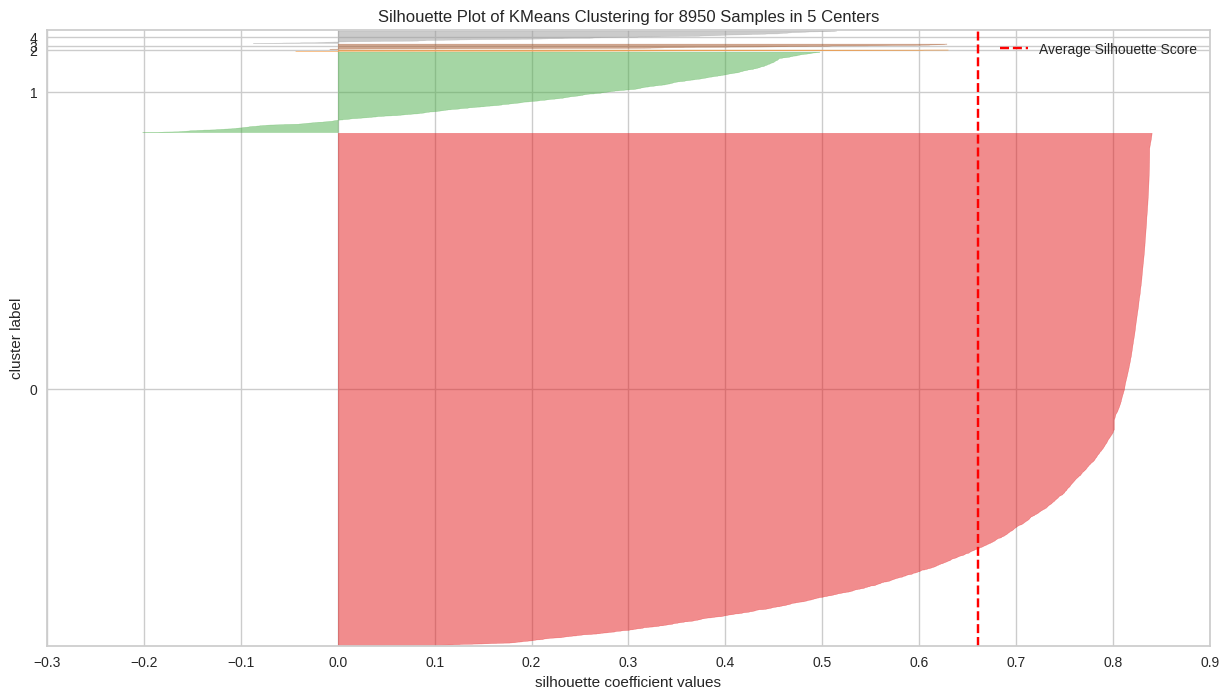

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 8950 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [29]:
from yellowbrick.cluster import SilhouetteVisualizer

fig = plt.figure(figsize = (15,8))

# Instantiate the clustering model and visualizer
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(selected_feat)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [30]:
from sklearn.metrics import silhouette_score
v=silhouette_score(selected_feat,kmeans5.labels_)
print("Silhouette score is " , v)

Silhouette score is  0.6573193814750035
